# **Import Libraries**

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE



# **Load data and explore**

In [11]:
#import data and store it in a dataframe
data = pd.read_csv('train.csv')

In [12]:
data.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [13]:
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

# **Data preprocessing**

Since all values are non-null we don't need to take care of missing values.

We need to encode the categorical data to numerical

In [15]:
#create encoder
encoder = LabelEncoder()
obj_columns = data.dtypes == 'object' #create boolean with object type = true
obj_indexes =  obj_columns.index[obj_columns] #store indexes of object columns
#convert columns with object type to numerical with encoder by column
for index in obj_indexes: 
  data[index] = encoder.fit_transform(data[index].astype(str))
#check dataframe for transformations
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


Now that all features are numerical, we can start some feature engineering:


In [16]:
#we can merge values from different times of day to obtain the net values
data['total_minutes'] = data['total_day_minutes'] + data['total_eve_minutes'] + data['total_night_minutes']
data['total_calls'] = data['total_day_calls'] + data['total_eve_calls'] + data['total_night_calls']
data['total_charge'] = data['total_day_charge'] + data['total_eve_charge'] + data['total_night_charge']

# **Data exploration & visualization**


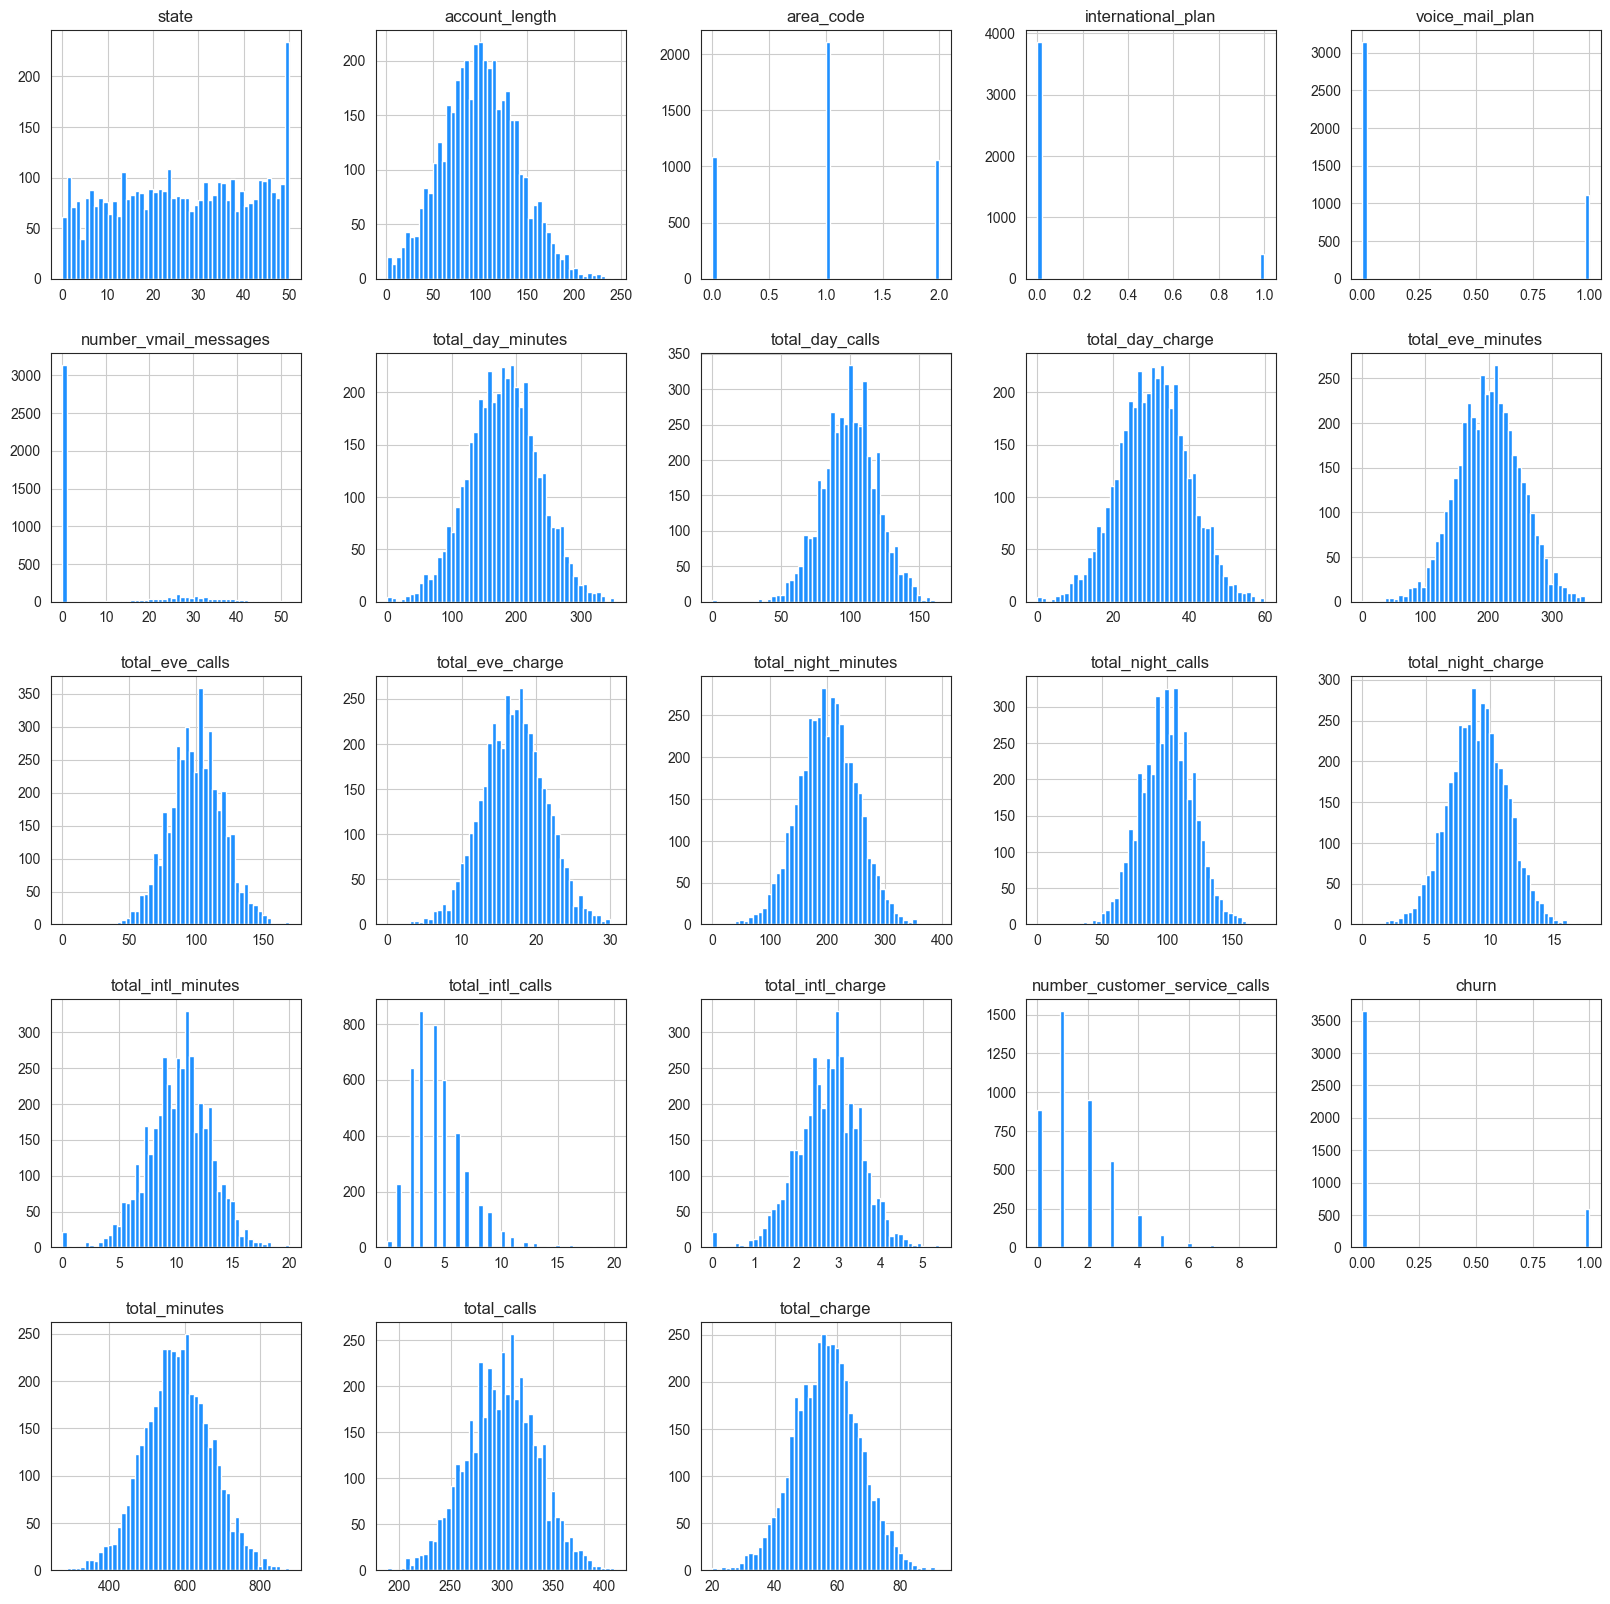

In [17]:
sns.set_style('white')
data.hist(bins=50,figsize=(20,20),color='dodgerblue');

**Correlation analysis**

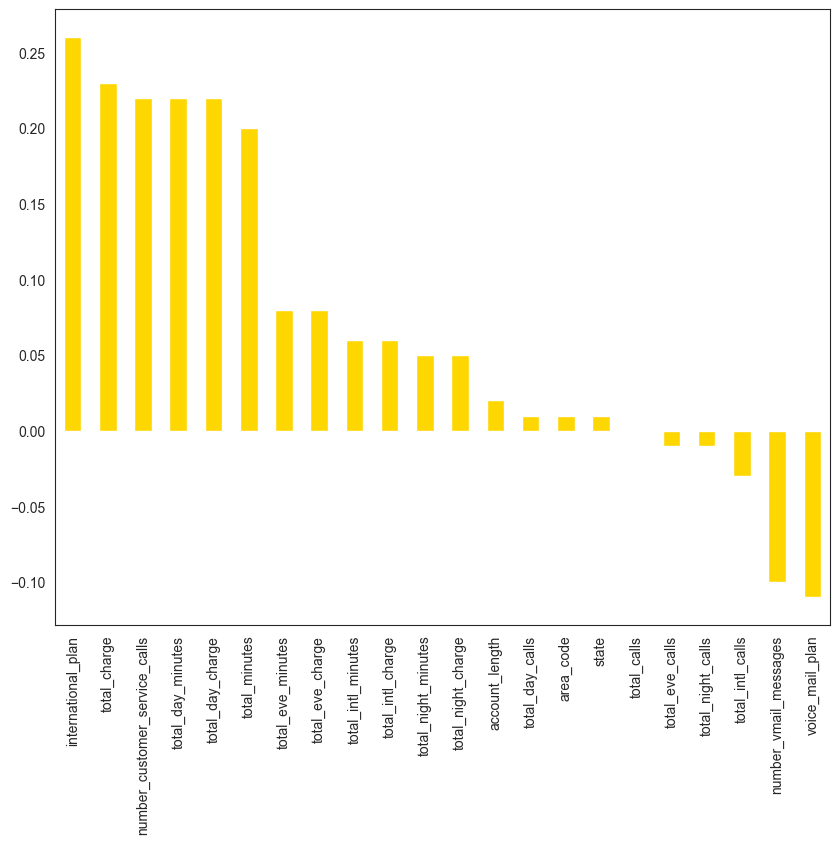

In [18]:
ca = round(data.corr()['churn'].sort_values(ascending = False)[1:] ,2 ).plot(kind = 'bar' ,color='gold' , figsize = (10,8))
plt.show() 

From this we can see that International plan, Total charge, number of customer service calls, total day minutes, total day charge and total minutes (day+eve+night), are the ones that are highly correlated with the target variable (churn). By contrast, account length, total day calls, state, total calls, total eve calls, total night calls and total international calls have no correlation with churn and are less likely to be features that may help the prediction.

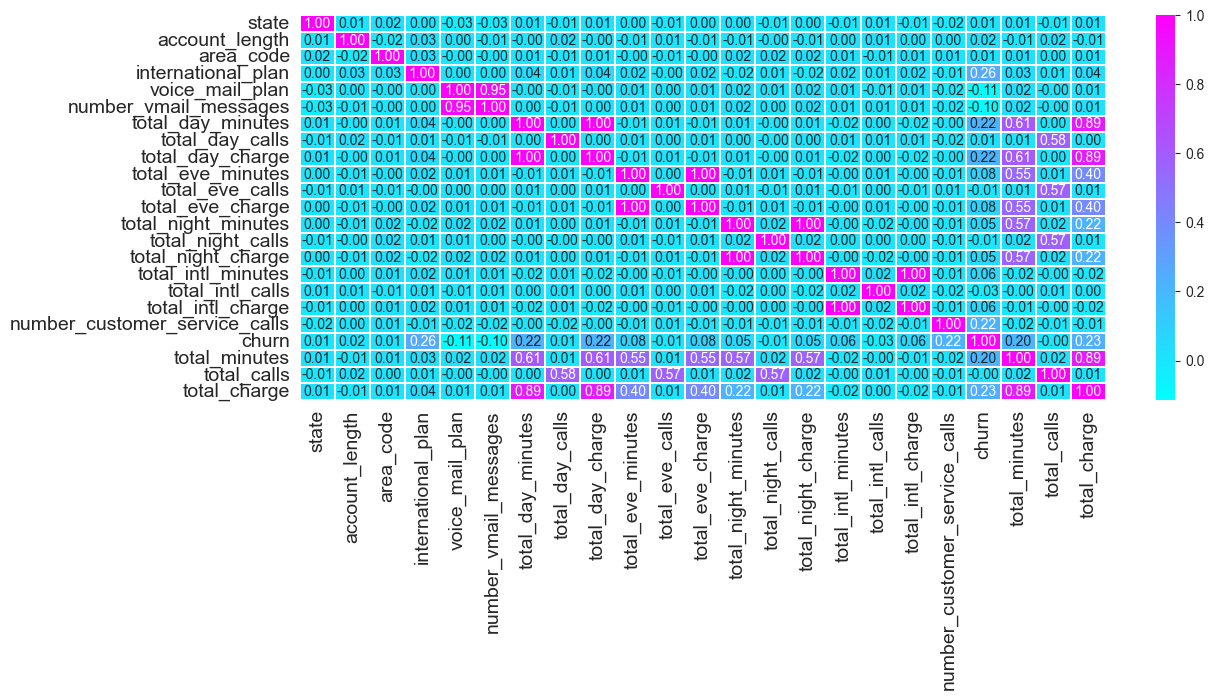

In [19]:
#another way of visualizing it is with the heatmap
fig = plt.subplots(figsize=[13,5])
sns.heatmap(data.corr(),  annot=True, linewidths=0.05, fmt= '.2f',cmap='cool')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show() 

**Split dataset Train-Test**

In [20]:
#split the data into train and test subsets
train, test = train_test_split(data, test_size=0.30)
print ('Train set:', train.shape)
print ('Val set:', test.shape)

Train set: (2975, 23)
Val set: (1275, 23)


In [21]:
#first we must store the column corresponding to the target variable (churn) as labels
train_labels = train['churn']
test_labels = test['churn']

#then we remove them from dataferame
train = train.drop('churn',  axis = 1)
print(train.shape)
test = test.drop('churn', axis = 1)
print(test.shape)
#lets see how is the distribution of churn feature
train_labels.value_counts()

(2975, 22)
(1275, 22)


0    2564
1     411
Name: churn, dtype: int64

As we can see, there is a big **imbalance** in the two classes, since there are way more cases of retaining (0) than churn (1). We can adress this by SMOTE ('Synthetic Minority Oversampling Technique')


In [22]:
balance = SMOTE(sampling_strategy='auto')
train, train_labels = balance.fit_resample(train, train_labels)

train_labels.value_counts()

0    2564
1    2564
Name: churn, dtype: int64

In [23]:
print(train.shape)

(5128, 22)


# **MODELING**
After balancing classes in the target variable, we can start to **train and test different models**

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score , precision_score, roc_auc_score , accuracy_score, confusion_matrix, ConfusionMatrixDisplay

Logistic regression baseline model

In [25]:
def show_scores(predicted, test_labels):
  print('Accuracy score: ', accuracy_score(test_labels, predicted))
  print('Recall score: ', recall_score(test_labels, predicted))
  print('Precision score: ', precision_score(test_labels, predicted))
  print('ROC AUC score: ', roc_auc_score(test_labels, predicted))

In [26]:
logReg_baseline = LogisticRegression( random_state = 100, max_iter = 5000)
logReg_baseline.fit(train,train_labels)
predicted_lr_baseline = logReg_baseline.predict(test)
show_scores(predicted_lr_baseline, test_labels)

Accuracy score:  0.8596078431372549
Recall score:  0.35294117647058826
Precision score:  0.532258064516129
ROC AUC score:  0.6498161764705883


### Hyperparameter Tuning
We can start hyperparameter tuning. We create a list of hyperparameters to experiment and which values they will take and the test all possibilities using GridSearchCV. Also this will perform k-folg cross validation.

In [27]:
def confusion_matrix_plot(predicted, test_labels, classifier):
  color = 'black'
  matrix = confusion_matrix(predicted, test_labels, labels=classifier.classes_)
  display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=classifier.classes_)
  display.plot()
  plt.title('Confusion Matrix', color=color)
  plt.xlabel('Predicted Label', color=color)
  plt.ylabel('True Label', color=color)

  plt.show()


#### Logistic Regression

/Users/bruno/Documents/churn-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bruno/Documents/churn-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/bruno/Documents/churn-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/opt/homebrew/Cellar/python@3.10/3.10.9/Frameworks/Python.framework/Versions/3.10/lib/python3.10/inspect.py", line 3185, in bind
    return self._bind(args, kwargs)
  File "/opt/homebrew/Cellar/python@3.10/3.10.9/Frameworks/Python.framework/Versions/3.10/lib/python3.10/inspect.py", line 3111, in _bind
    raise TypeError(
TypeError: too many po

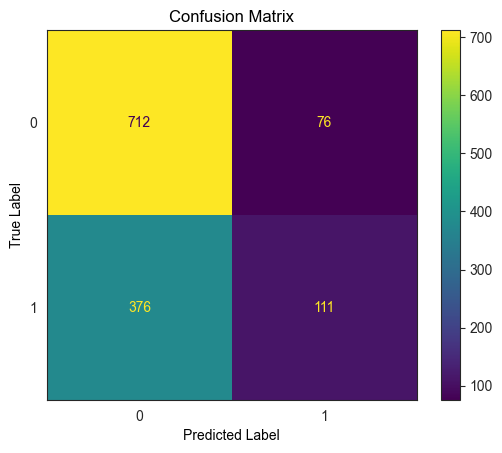

Accuracy score:  0.6454901960784314
Recall score:  0.5935828877005348
Precision score:  0.22792607802874743
ROC AUC score:  0.6239973262032086


In [28]:
logReg = LogisticRegression(random_state=100, max_iter = 10000)

param_grid = {
    'penalty': ['l1','l2'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
}

lr = RandomizedSearchCV(estimator=logReg, param_distributions=param_grid, scoring=accuracy_score, cv=5, verbose=False, n_jobs=-1)

best_lr = lr.fit(train, train_labels)
predicted_lr = best_lr.predict(test)
confusion_matrix_plot(predicted_lr, test_labels, best_lr)
show_scores(predicted_lr, test_labels)

#### Random Forest

/Users/bruno/Documents/churn-prediction/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/bruno/Documents/churn-prediction/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/bruno/Documents/churn-prediction/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, expli

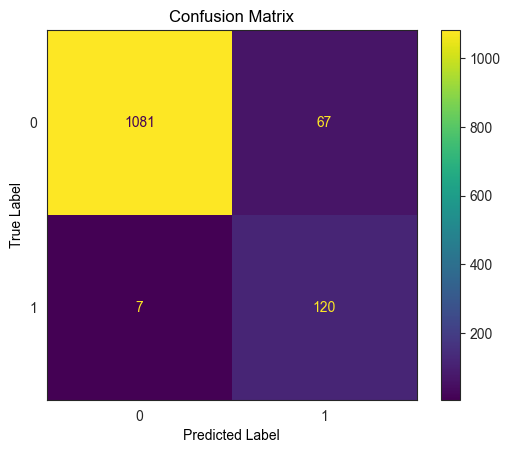

Accuracy score:  0.9419607843137255
Recall score:  0.6417112299465241
Precision score:  0.9448818897637795
ROC AUC score:  0.8176387032085561


In [29]:
random_forest = RandomForestClassifier(random_state=100,)
param_grid = {
    'n_estimators': [100],
    'criterion': ['entropy', 'gini'],
    'bootstrap': [True, False],
    'max_depth': [6],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [2, 3, 5],
    'min_samples_split': [2, 3, 5]
}

rf = RandomizedSearchCV(estimator=random_forest,
                      param_distributions=param_grid,
                      scoring=accuracy_score,
                      cv=5,
                      verbose=False,
                      n_jobs=-1)

best_rf = rf.fit(train, train_labels)
predicted_rf = best_rf.predict(test)
confusion_matrix_plot(predicted_rf, test_labels, best_rf)
show_scores(predicted_rf, test_labels)

#### Gradient Boosting 

/Users/bruno/Documents/churn-prediction/venv/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/bruno/Documents/churn-prediction/venv/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/bruno/Documents/churn-prediction/venv/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/bruno/Documents/churn-prediction/venv/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 a

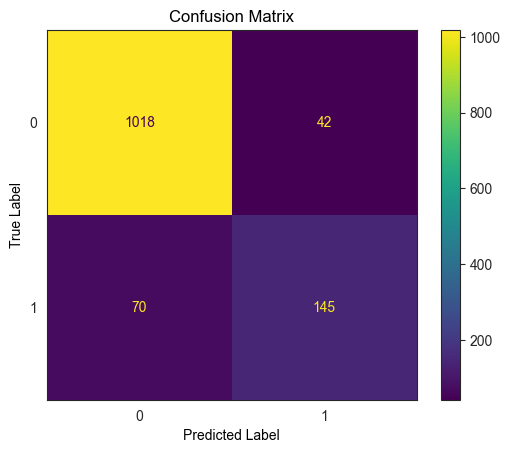

Accuracy score:  0.912156862745098
Recall score:  0.7754010695187166
Precision score:  0.6744186046511628
ROC AUC score:  0.8555314171122994


In [30]:
gradient_boosting = GradientBoostingClassifier(random_state=100,)
param_grid = {
    'n_estimators': [600],
    'subsample': [0.66, 0.75],
    'learning_rate': [0.001, 0.01],
    'max_depth': [3],  # default=3
    'min_samples_split': [5, 7],
    'min_samples_leaf': [3, 5],
    'max_features': ['auto', 'log2', None],
    'n_iter_no_change': [20],
    'validation_fraction': [0.2],
    'tol': [0.01]
}

gbm = RandomizedSearchCV(estimator=gradient_boosting,
                      param_distributions=param_grid,
                      scoring=accuracy_score,
                      cv=5,
                      verbose=False,
                      n_jobs=-1)

best_gbm = gbm.fit(train, train_labels)
predicted_gbm = best_gbm.predict(test)
confusion_matrix_plot(predicted_gbm, test_labels, best_gbm)
show_scores(predicted_gbm, test_labels)

#### XGBoost

/Users/bruno/Documents/churn-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bruno/Documents/churn-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/bruno/Documents/churn-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/opt/homebrew/Cellar/python@3.10/3.10.9/Frameworks/Python.framework/Versions/3.10/lib/python3.10/inspect.py", line 3185, in bind
    return self._bind(args, kwargs)
  File "/opt/homebrew/Cellar/python@3.10/3.10.9/Frameworks/Python.framework/Versions/3.10/lib/python3.10/inspect.py", line 3111, in _bind
    raise TypeError(
TypeError: too many po

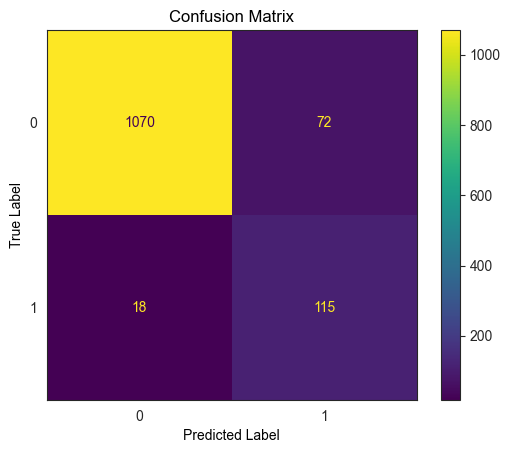

Accuracy score:  0.9294117647058824
Recall score:  0.6149732620320856
Precision score:  0.8646616541353384
ROC AUC score:  0.7992145721925134


In [31]:
xgboost = XGBClassifier(random_state=100)

param_grid = {
    'n_estimators': [50],
    'learning_rate': [0.001, 0.01],
    'max_depth': [3, 4],  # default=6
    'reg_alpha': [1, 2],
    'reg_lambda': [1, 2],
    'subsample': [0.5, 0.75],
    'colsample_bytree': [0.50, 0.75],
    'gamma': [0.1, 0.5, 1],
    'min_child_weight': [1]
}

xgb = RandomizedSearchCV(estimator=xgboost,
                       param_distributions=param_grid,
                       scoring=accuracy_score,
                       cv=5,
                       verbose=False,
                       n_jobs=-1)



best_xgb = xgb.fit(train, train_labels)
predicted_xgb = best_xgb.predict(test)
confusion_matrix_plot(predicted_xgb, test_labels, best_xgb)
show_scores(predicted_xgb, test_labels)

We can see that from training this models, the Random Forest was the one with the best performance scores.

# Prediction using Neural Network models

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)

In [76]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(units= 20, input_shape = (X_train.shape[1],), activation='relu', kernel_initializer = 'he_normal'))
model.add(Dense(units = 12, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation = 'sigmoid'))


model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 20)                460       
                                                                 
 dense_60 (Dense)            (None, 12)                252       
                                                                 
 dropout_24 (Dropout)        (None, 12)                0         
                                                                 
 dense_61 (Dense)            (None, 1)                 13        
                                                                 
Total params: 725
Trainable params: 725
Non-trainable params: 0
_________________________________________________________________


In [77]:

history = model.fit(X_train, train_labels, epochs = 100, batch_size = 25, verbose = 1, validation_data=(X_test, test_labels))


loss, acc = model.evaluate(X_test, test_labels)
print('Accuracy of model is : %.3f' %acc)

Epoch 1/100
206/206 [==============================] - 1s 909us/step - loss: 0.6778 - accuracy: 0.5889 - val_loss: 0.6090 - val_accuracy: 0.7216
Epoch 2/100
206/206 [==============================] - 0s 544us/step - loss: 0.5430 - accuracy: 0.7223 - val_loss: 0.4887 - val_accuracy: 0.8133
Epoch 3/100
206/206 [==============================] - 0s 537us/step - loss: 0.4760 - accuracy: 0.7691 - val_loss: 0.4416 - val_accuracy: 0.8196
Epoch 4/100
206/206 [==============================] - 0s 535us/step - loss: 0.4332 - accuracy: 0.7999 - val_loss: 0.3917 - val_accuracy: 0.8463
Epoch 5/100
206/206 [==============================] - 0s 532us/step - loss: 0.4129 - accuracy: 0.8220 - val_loss: 0.3893 - val_accuracy: 0.8416
Epoch 6/100
206/206 [==============================] - 0s 536us/step - loss: 0.4008 - accuracy: 0.8243 - val_loss: 0.3634 - val_accuracy: 0.8604
Epoch 7/100
206/206 [==============================] - 0s 539us/step - loss: 0.3873 - accuracy: 0.8350 - val_loss: 0.3555 - val_ac

<AxesSubplot: title={'center': 'Accuracy'}>

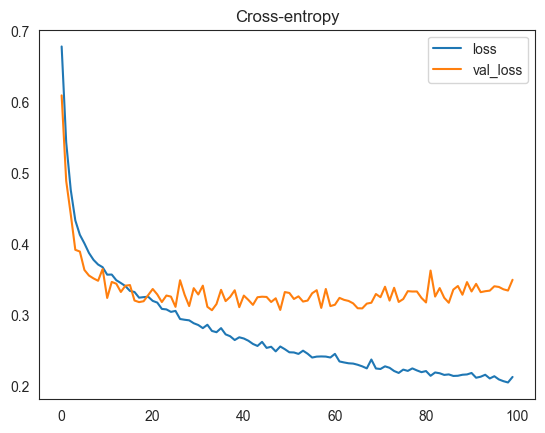

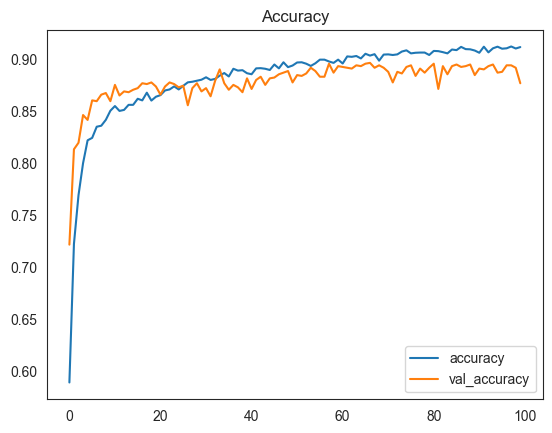

In [78]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss','val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [79]:
# predict the churn values
ypred = model.predict(X_test)
print(ypred)
# unscaling the ypred values 
ypred_lis = []
for i in ypred:
    if i>0.5:
        ypred_lis.append(1)
    else:
        ypred_lis.append(0)
print(ypred_lis)

40/40 [==============================] - 0s 340us/step
[[0.01971128]
 [0.19024481]
 [0.8135183 ]
 ...
 [0.10808803]
 [0.07198988]
 [0.21869141]]
[0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [80]:
#make dataframe for comparing the orignal and predict values
data_pred = {'orignal_churn':test_labels, 'predicted_churn':ypred_lis}
data_prediction = pd.DataFrame(data_pred)
data_prediction.head(10)

,orignal_churn,predicted_churn
3352,0,0
2893,0,0
1983,0,1
1712,0,0
2498,0,0
2740,0,0
3791,1,1
917,0,0
1363,0,1
1272,0,0


In [91]:
from sklearn.metrics import classification_report

#print classification_report
print(classification_report(test_labels,ypred_lis))


              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1088
           1       0.57      0.67      0.62       187

    accuracy                           0.88      1275
   macro avg       0.75      0.79      0.77      1275
weighted avg       0.89      0.88      0.88      1275



Overall, the neural network model perfomed better than logistic regression, gradient boosting and random forest models